<a href="https://colab.research.google.com/github/Ngoc-Cac/LTPTDL-Group2/blob/duc/Astar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

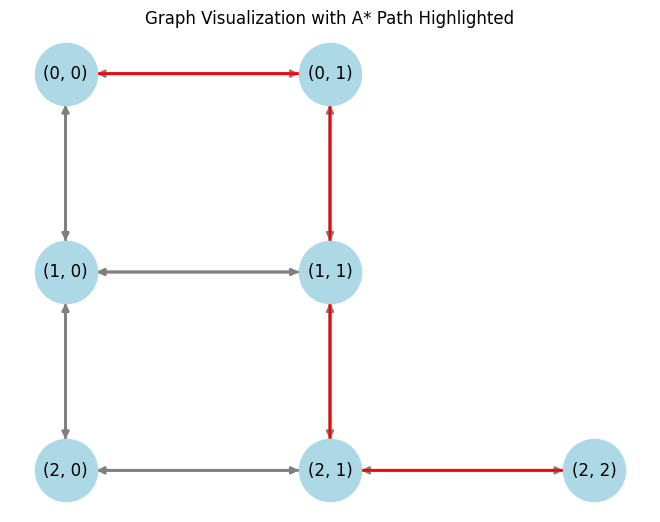

In [ ]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def a_star(graph, start, goal):
    open_set = []
    heapq.heappush(open_set, (0, start))
    came_from = {}
    g_score = {node: float('inf') for node in graph}
    g_score[start] = 0
    f_score = {node: float('inf') for node in graph}
    f_score[start] = heuristic(start, goal)

    while open_set:
        _, current = heapq.heappop(open_set)
        if current == goal:
            return reconstruct_path(came_from, current)

        for neighbor, cost in graph[current].items():
            tentative_g_score = g_score[current] + cost
            if tentative_g_score < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                f_score[neighbor] = g_score[neighbor] + heuristic(neighbor, goal)
                heapq.heappush(open_set, (f_score[neighbor], neighbor))

    return None

def reconstruct_path(came_from, current):
    total_path = [current]
    while current in came_from:
        current = came_from[current]
        total_path.append(current)
    total_path.reverse()
    return total_path

def path_to_edges(path):
    return [(path[i], path[i + 1]) for i in range(len(path) - 1)]

# Define the graph
graph = {
    (0, 0): {(1, 0): 1, (0, 1): 1},
    (1, 0): {(0, 0): 1, (1, 1): 1, (2, 0): 1},
    (0, 1): {(0, 0): 1, (1, 1): 1},
    (1, 1): {(1, 0): 1, (0, 1): 1, (2, 1): 1},
    (2, 0): {(1, 0): 1, (2, 1): 1},
    (2, 1): {(2, 0): 1, (1, 1): 1, (2, 2): 1},
    (2, 2): {(2, 1): 1}
}

start = (0, 0)
goal = (2, 2)

# Use NetworkX to create the graph
G = nx.DiGraph()
for node, edges in graph.items():
    for dest, weight in edges.items():
        G.add_edge(node, dest, weight=weight)

# Get the path from A* algorithm
path = a_star(graph, start, goal)

# Plotting
pos = {node: (node[1], -node[0]) for node in graph}  # position nodes based on grid coordinates
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, edge_color='gray', width=2)
nx.draw_networkx_edges(G, pos, edgelist=path_to_edges(path), edge_color='red', width=2)
plt.title('Graph Visualization with A* Path Highlighted')
plt.show()

Running Dijkstra:
Visiting node (0, 0) with current g-score 0
Visiting node (1, 0) with current g-score 1
Visiting node (0, 1) with current g-score 2
Visiting node (1, 1) with current g-score 2
Goal reached!
Path: (0, 0) -> (1, 1)


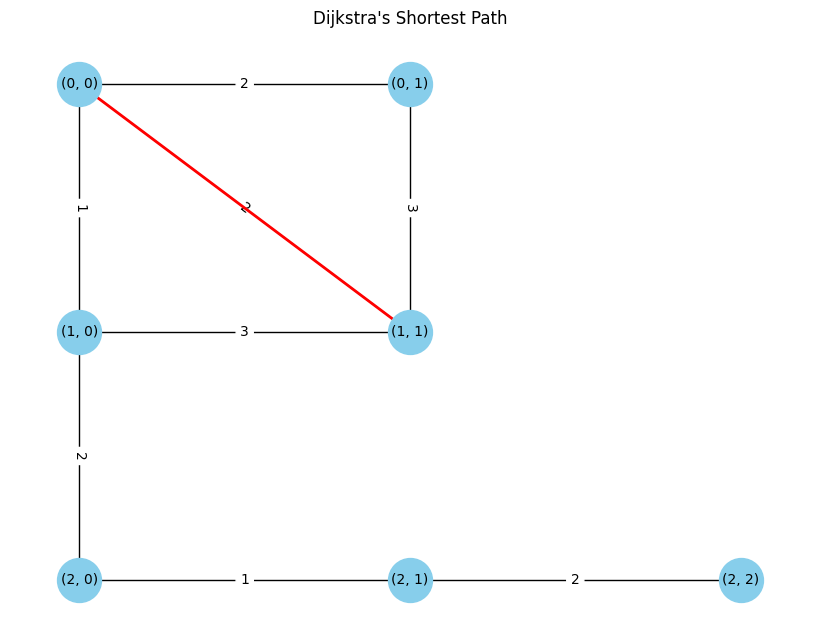


Running A*:
Visiting node (0, 0) with f-score 2
Visiting node (1, 0) with f-score 2
Visiting node (1, 1) with f-score 2
Goal reached!
Path: (0, 0) -> (1, 1)


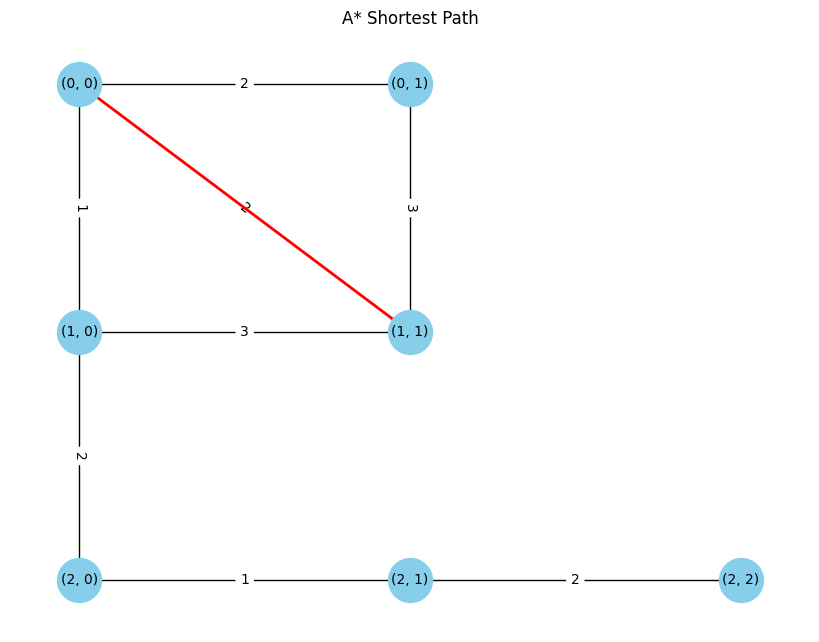

In [ ]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

class Node:
    def __init__(self, name):
        self.name = name
        self.neighbors = {}

    def add_neighbor(self, neighbor, weight=1):
        self.neighbors[neighbor] = weight

class Graph:
    def __init__(self):
        self.nodes = {}

    def add_node(self, name):
        self.nodes[name] = Node(name)

    def add_edge(self, node_a, node_b, weight=1):
        if node_a not in self.nodes:
            self.add_node(node_a)
        if node_b not in self.nodes:
            self.add_node(node_b)
        self.nodes[node_a].add_neighbor(node_b, weight)
        self.nodes[node_b].add_neighbor(node_a, weight)  # Assuming undirected graph

    def heuristic(self, a, b):
        # Assuming nodes are tuples with coordinates (e.g., (x, y))
        return abs(a[0] - b[0]) + abs(a[1] - b[1])

    def dijkstra(self, start, goal):
        open_set = []
        heapq.heappush(open_set, (0, start))
        came_from = {}
        g_score = {node: float('inf') for node in self.nodes}
        g_score[start] = 0

        while open_set:
            current_g, current_node = heapq.heappop(open_set)
            print(f"Visiting node {current_node} with current g-score {current_g}")

            if current_node == goal:
                print("Goal reached!")
                return self.reconstruct_path(came_from, current_node)

            for neighbor, weight in self.nodes[current_node].neighbors.items():
                tentative_g_score = g_score[current_node] + weight
                if tentative_g_score < g_score[neighbor]:
                    came_from[neighbor] = current_node
                    g_score[neighbor] = tentative_g_score
                    heapq.heappush(open_set, (tentative_g_score, neighbor))

        return None

    def a_star(self, start, goal):
        open_set = []
        heapq.heappush(open_set, (0, start))
        came_from = {}
        g_score = {node: float('inf') for node in self.nodes}
        g_score[start] = 0
        f_score = {node: float('inf') for node in self.nodes}
        f_score[start] = self.heuristic(start, goal)

        while open_set:
            _, current = heapq.heappop(open_set)
            print(f"Visiting node {current} with f-score {f_score[current]}")

            if current == goal:
                print("Goal reached!")
                return self.reconstruct_path(came_from, current)

            for neighbor, weight in self.nodes[current].neighbors.items():
                tentative_g_score = g_score[current] + weight
                if tentative_g_score < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g_score
                    f_score[neighbor] = g_score[neighbor] + self.heuristic(neighbor, goal)
                    heapq.heappush(open_set, (f_score[neighbor], neighbor))

        return None

    def reconstruct_path(self, came_from, current):
        total_path = [current]
        while current in came_from:
            current = came_from[current]
            total_path.append(current)
        total_path.reverse()
        print("Path:", " -> ".join(map(str, total_path)))
        return total_path

    def visualize(self, path=None, title="Graph Visualization"):
        G = nx.Graph()
        for node_name, node in self.nodes.items():
            for neighbor, weight in node.neighbors.items():
                G.add_edge(node_name, neighbor, weight=weight)

        pos = {node: (node[1], -node[0]) for node in self.nodes}  # Assuming node names are coordinates
        plt.figure(figsize=(8, 6))
        nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1000, font_size=10)
        edge_labels = nx.get_edge_attributes(G, 'weight')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

        if path:
            path_edges = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
            nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=2)

        plt.title(title)
        plt.show()

# Example Usage:
graph = Graph()

# Add nodes and edges to the graph (nodes are tuples representing coordinates)
graph.add_edge((0, 0), (1, 0), 1)
graph.add_edge((0, 0), (0, 1), 2)
graph.add_edge((1, 0), (1, 1), 3)
graph.add_edge((1, 1), (0, 1), 3)
graph.add_edge((1, 0), (2, 0), 2)
graph.add_edge((2, 0), (2, 1), 1)
graph.add_edge((2, 1), (2, 2), 2)
graph.add_edge((0, 0), (1, 1), 2)

start = (0, 0)
goal = (1, 1)

# Run Dijkstra
print("Running Dijkstra:")
dijkstra_path = graph.dijkstra(start, goal)
graph.visualize(dijkstra_path, title="Dijkstra's Shortest Path")

# Run A*
print("\nRunning A*:")
a_star_path = graph.a_star(start, goal)
graph.visualize(a_star_path, title="A* Shortest Path")
